In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")
on_base = on_base.filter(pl.col("event_type").is_in(["sac_fly", "field_out"]))
on_base = on_base.with_columns(
    pl.col("event_type").replace({"sac_fly": "Successful", "field_out": "Unsuccessful"})
)

In [2]:
arm_strength_pd = on_base.select(["max_arm_strength_fielder_mlb_person_id", "event_type"]).drop_nulls().collect().to_pandas()

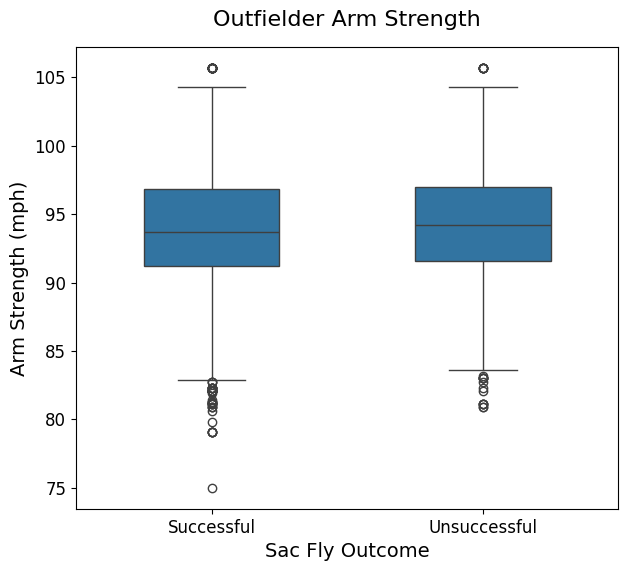

In [5]:
# --- Plot for distance_traveled_fielder ---
plt.figure(figsize=(7, 6))
sns.boxplot(x='event_type', y='max_arm_strength_fielder_mlb_person_id', data=arm_strength_pd, width=0.5)
plt.title('Outfielder Arm Strength', fontsize=16, pad=15)
plt.xlabel('Sac Fly Outcome', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Arm Strength (mph)', fontsize=14)
plt.show()